In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [3]:
import glob

In [4]:
glob.glob(r'/Users/paramchauhan/S&P_resources/individual_stocks_5yr/*MSFT_data.csv')

['/Users/paramchauhan/S&P_resources/individual_stocks_5yr/MSFT_data.csv']

In [5]:
company_list = [
    r'/Users/paramchauhan/S&P_resources/individual_stocks_5yr/AAPL_data.csv' ,
    r'/Users/paramchauhan/S&P_resources/individual_stocks_5yr/AMZN_data.csv' ,
    r'/Users/paramchauhan/S&P_resources/individual_stocks_5yr/GOOG_data.csv' ,
    r'/Users/paramchauhan/S&P_resources/individual_stocks_5yr/MSFT_data.csv' ,
]   



    

In [6]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([current_df , all_data] , ignore_index=True)
    ##full_df = pd.concat([all_data, current_data], ignore_index = True)


In [8]:
all_data.shape

(4752, 7)

In [9]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.310,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.500,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.750,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.880,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.870,28.04,32663174,MSFT
5,2013-02-15,28.04,28.16,27.875,28.01,49650538,MSFT


In [10]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [11]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [12]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [13]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [14]:
tech_list = all_data['Name'].unique()

In [15]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

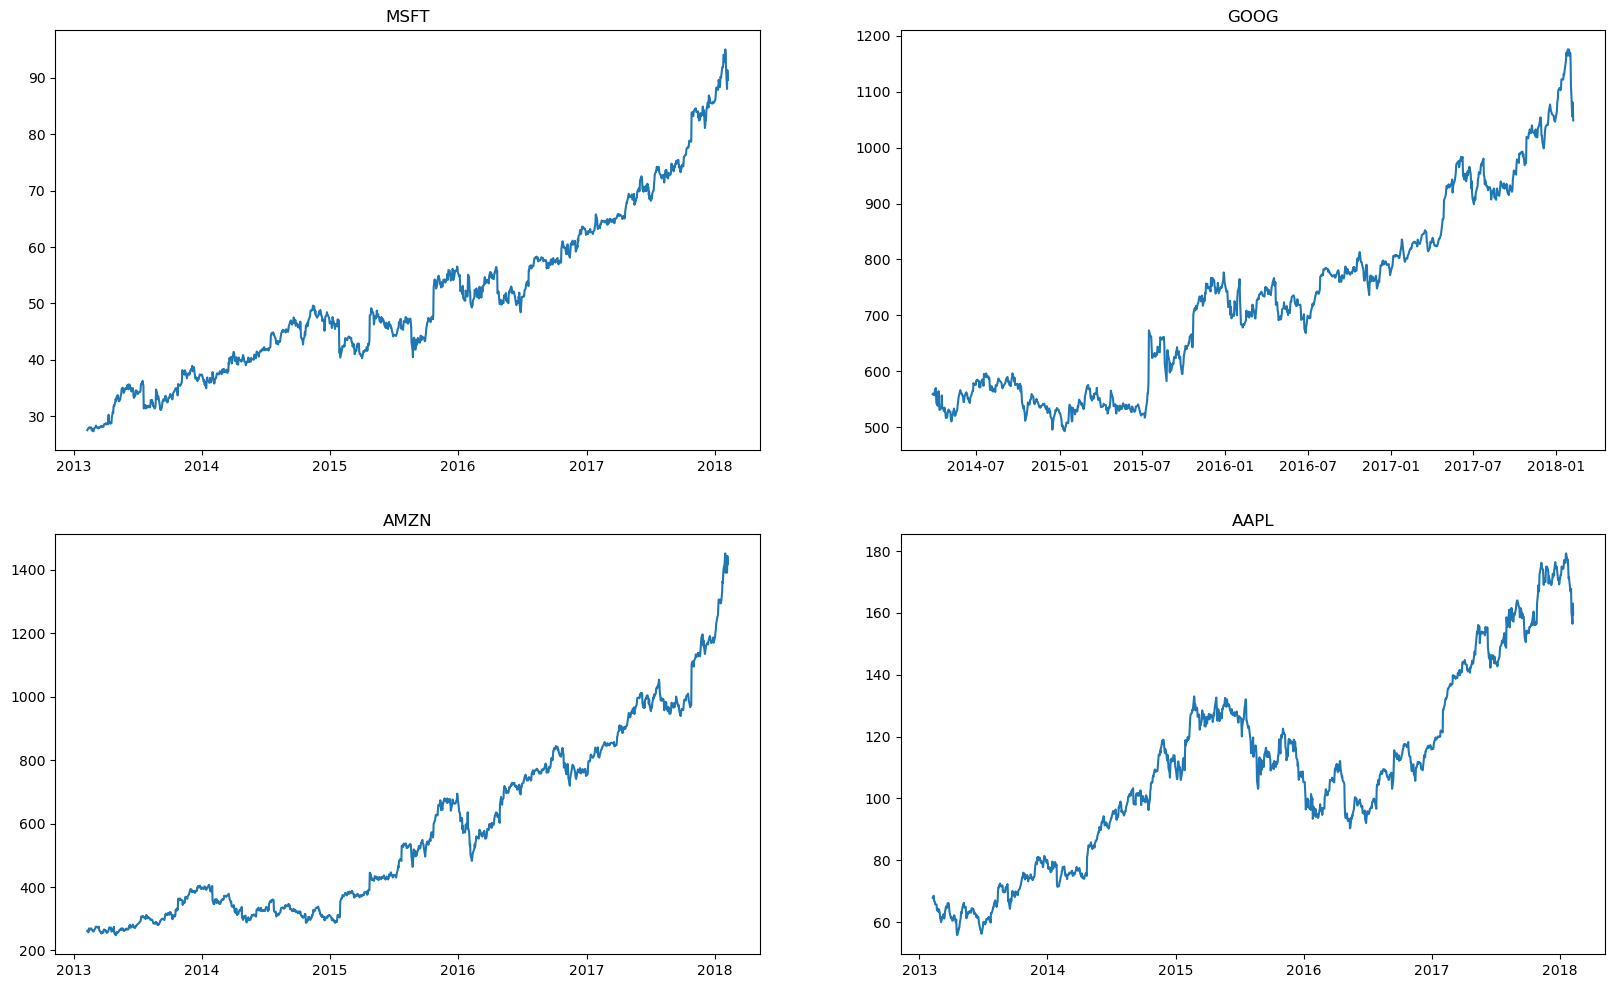

In [16]:

plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list, 1):
    plt.subplot(2 , 2 , index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

In [17]:
all_data.head(15)


,date,open,high,low,close,volume,Name
0,2013-02-08,27.3500,27.71,27.310,27.550,33318306,MSFT
1,2013-02-11,27.6500,27.92,27.500,27.860,32247549,MSFT
2,2013-02-12,27.8800,28.00,27.750,27.880,35990829,MSFT
3,2013-02-13,27.9300,28.11,27.880,28.030,41715530,MSFT
4,2013-02-14,27.9200,28.06,27.870,28.040,32663174,MSFT
5,2013-02-15,28.0400,28.16,27.875,28.010,49650538,MSFT
6,2013-02-19,27.8801,28.09,27.800,28.045,38804616,MSFT
7,2013-02-20,28.1300,28.20,27.830,27.870,44109412,MSFT
8,2013-02-21,27.7400,27.74,27.230,27.490,49078338,MSFT
9,2013-02-22,27.6800,27.76,27.480,27.760,31425726,MSFT


In [19]:
all_data['close'].rolling(window=10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [20]:
new_data = all_data.copy()

In [25]:
ma_day = [10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [26]:
new_data

,date,open,high,low,close,volume,Name,close_10,close_20,close_30,close_50
0,2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN,NaN
1,2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN,NaN
2,2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN,NaN
3,2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN,NaN
4,2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4747,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,173.409333,172.8252
4748,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.941333,172.6356
4749,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.346000,172.3026
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,171.946667,172.0640


In [27]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_30,close_50
4745,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,174.263,174.3340,173.915333,172.9460
4746,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,173.096,174.0925,173.697333,172.8726
4747,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,171.948,173.8700,173.409333,172.8252
4748,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.941333,172.6356
4749,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.346000,172.3026
4750,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,166.700,171.7520,171.946667,172.0640
4751,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.431000,171.7554


In [28]:
new_data.set_index('date', inplace =True)

In [29]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_30,close_50
date,,,,,,,,,,
2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN,NaN
2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN,NaN
2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN,NaN
2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN,NaN
2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,173.409333,172.8252
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.941333,172.6356
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.346000,172.3026


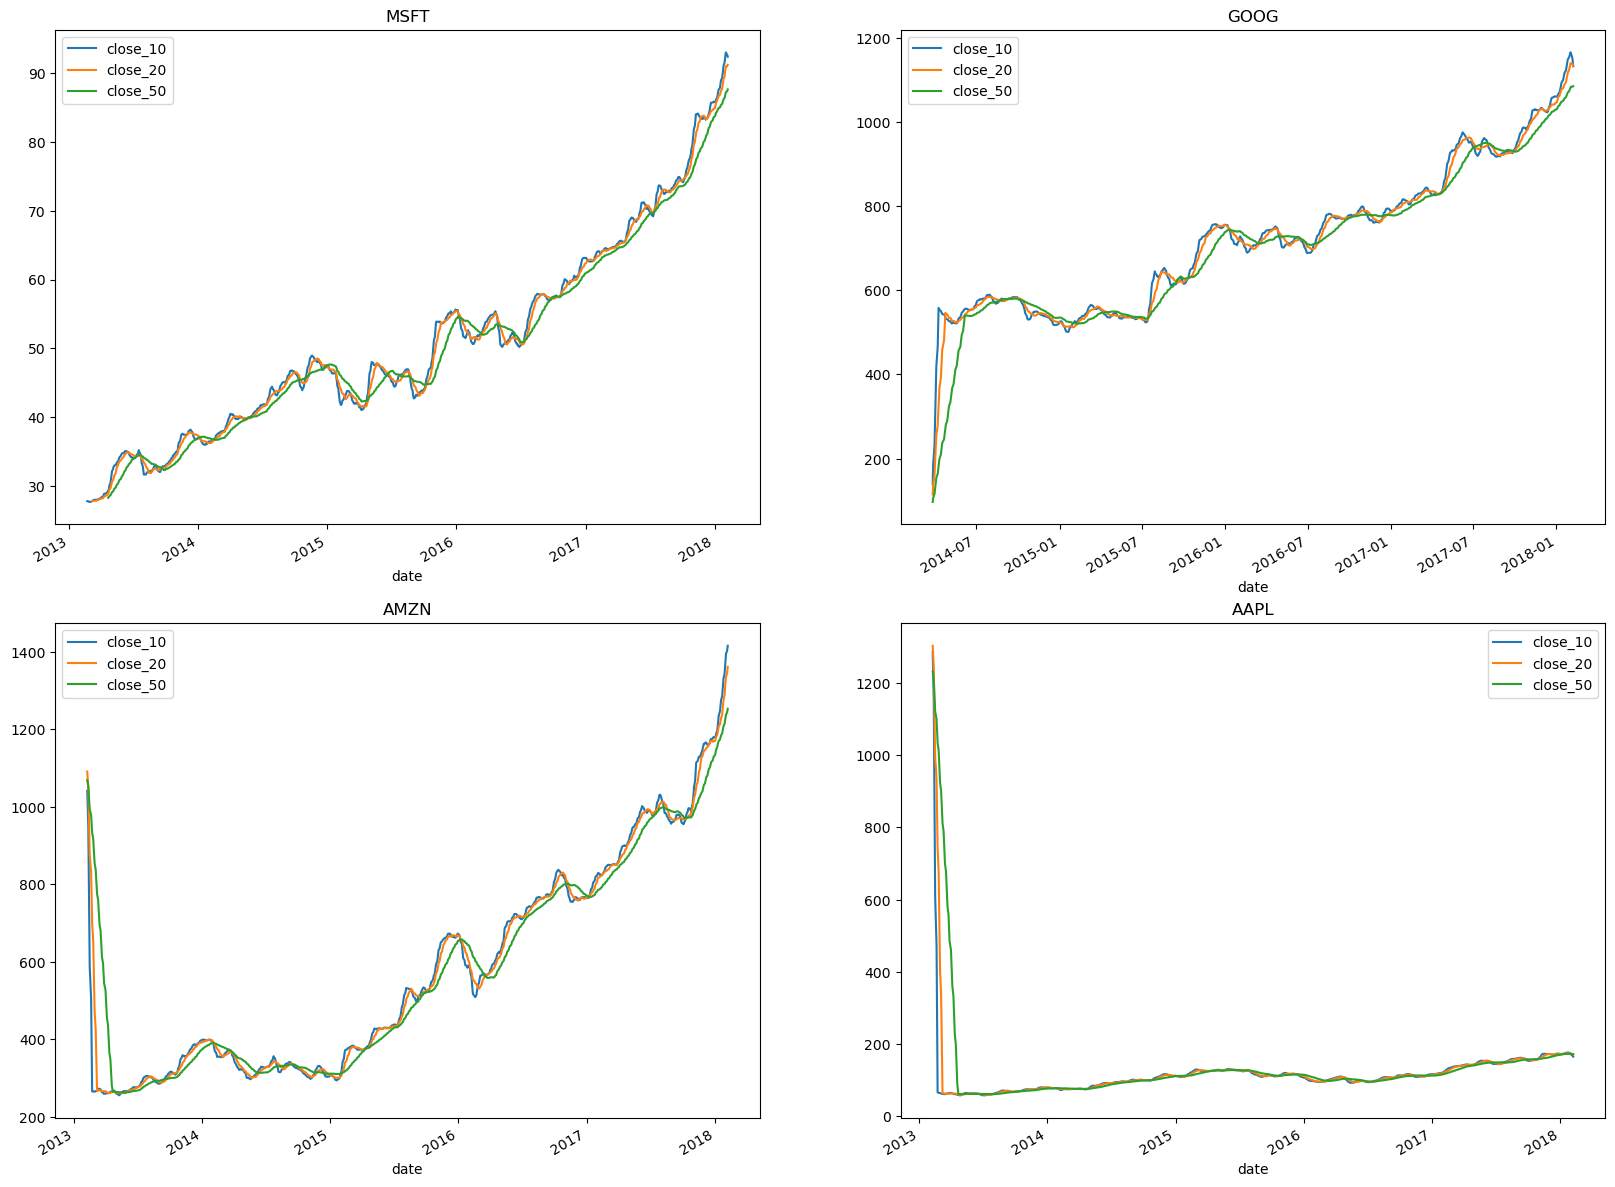

In [38]:
plt.figure(figsize=(20,16))
for index, company in enumerate(tech_list, 1):
    plt.subplot(2 , 2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

In [39]:
company_list

['/Users/paramchauhan/S&P_resources/individual_stocks_5yr/AAPL_data.csv',
 '/Users/paramchauhan/S&P_resources/individual_stocks_5yr/AMZN_data.csv',
 '/Users/paramchauhan/S&P_resources/individual_stocks_5yr/GOOG_data.csv',
 '/Users/paramchauhan/S&P_resources/individual_stocks_5yr/MSFT_data.csv']

In [41]:
apple = pd.read_csv('/Users/paramchauhan/S&P_resources/individual_stocks_5yr/AAPL_data.csv')

In [42]:
apple

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [43]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [57]:
apple['Daily return(in %)'] = apple['close'].pct_change() * 100

In [58]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [48]:
import plotly.express as px

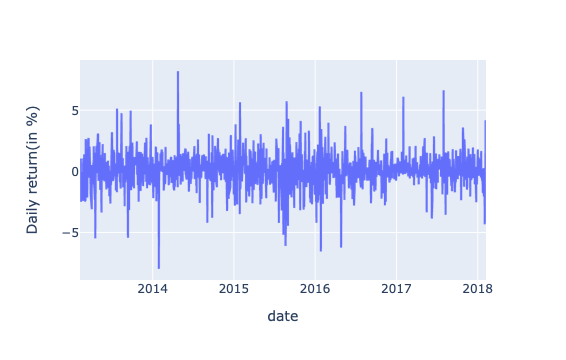

In [59]:
px.line(apple, x='date', y='Daily return(in %)')

In [60]:
apple['date'] = pd.to_datetime(apple['date'])

In [61]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [62]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [63]:
apple.set_index('date', inplace=True)

In [64]:
apple.head(4)


,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


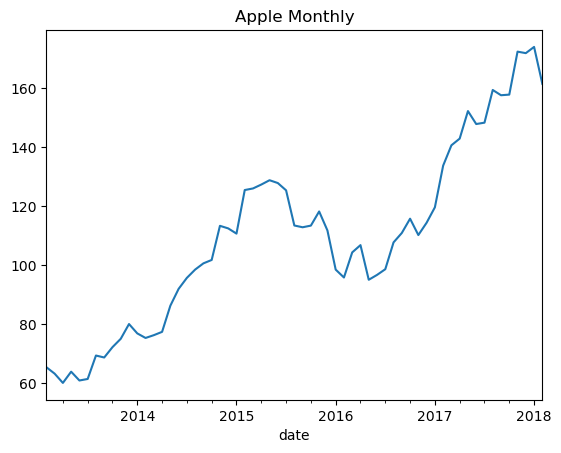

In [94]:
apple_monthly_resampling_analysis = apple['close'].resample('M').mean().plot()
plt.title('Apple Monthly')
plt.show()

<Axes: xlabel='date'>

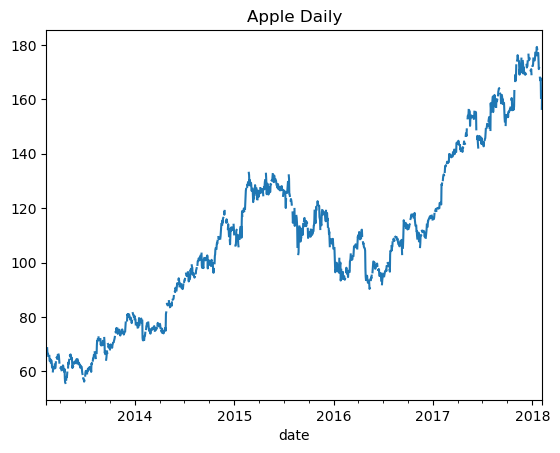

In [91]:
apple_daily_resampling_analysis = apple['close'].resample('D').mean().plot()

plt.title('Apple Daily')
plt.show()


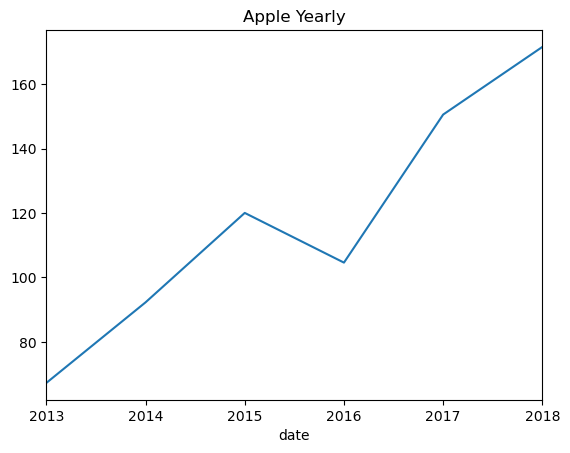

In [92]:
apple_yearly_resampling_analysis = apple['close'].resample('Y').mean().plot()
plt.title('Apple Yearly')
plt.show()

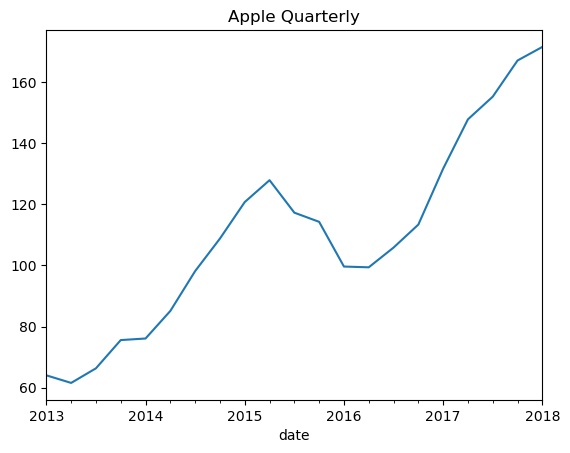

In [93]:
apple_quarterly_resampling_analysis = apple['close'].resample('Q').mean().plot()
plt.title('Apple Quarterly')
plt.show()

In [95]:
company_list

['/Users/paramchauhan/S&P_resources/individual_stocks_5yr/AAPL_data.csv',
 '/Users/paramchauhan/S&P_resources/individual_stocks_5yr/AMZN_data.csv',
 '/Users/paramchauhan/S&P_resources/individual_stocks_5yr/GOOG_data.csv',
 '/Users/paramchauhan/S&P_resources/individual_stocks_5yr/MSFT_data.csv']

In [97]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [98]:
closing_price = pd.DataFrame()

In [ ]:
app['close']

In [100]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['google_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [101]:
closing_price

,apple_close,amzn_close,google_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


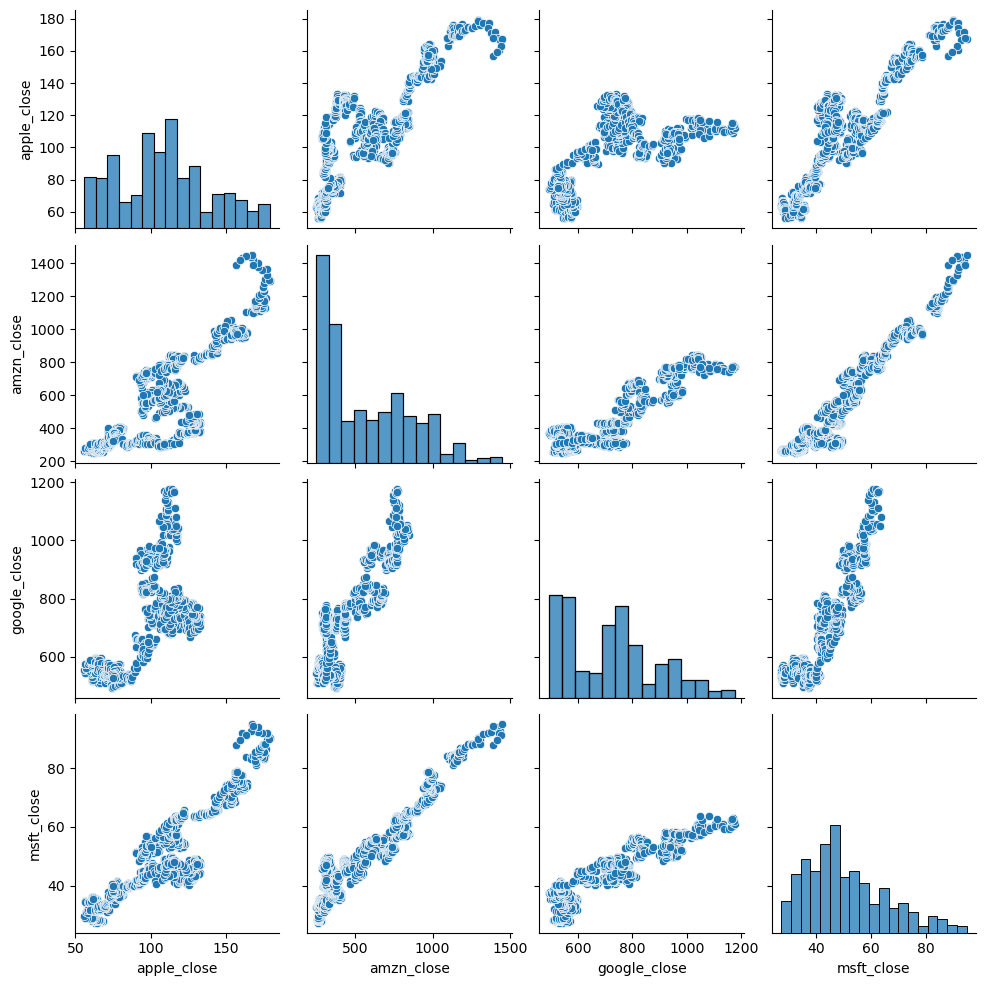

In [105]:
sns.pairplot(closing_price)


In [106]:
closing_price.corr()

,apple_close,amzn_close,google_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

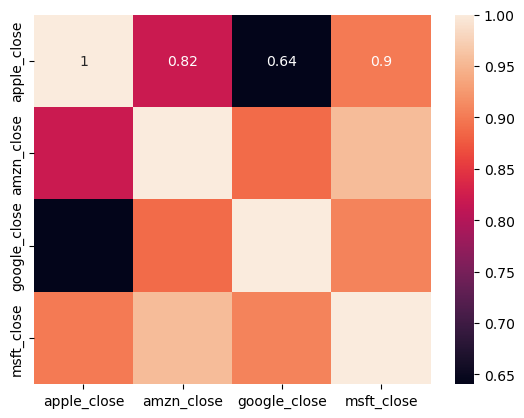

In [108]:
sns.heatmap(closing_price.corr(), annot=True)

In [109]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [110]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [115]:
## closing_price['apple_close'] - closing_price['apple_close'].shift(1) / closing_price['apple_close'].shift(1) * 100
closing_price['apple_close'].pct_change() * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [116]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'google_close', 'msft_close'], dtype='object')

In [117]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = closing_price[col].pct_change() * 100
    
    

In [118]:
 closing_price

,apple_close,amzn_close,google_close,msft_close,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,0.000000,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,0.000000,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,0.000000,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,0.000000,3.784091


In [120]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'google_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [122]:
clsing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change']]

In [123]:
clsing_p

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,0.000000,-0.789391
1255,-4.339015,2.874101,0.000000,-2.631021
1256,-2.498442,-2.793804,0.000000,-4.118544
1257,4.179181,3.801439,0.000000,3.784091


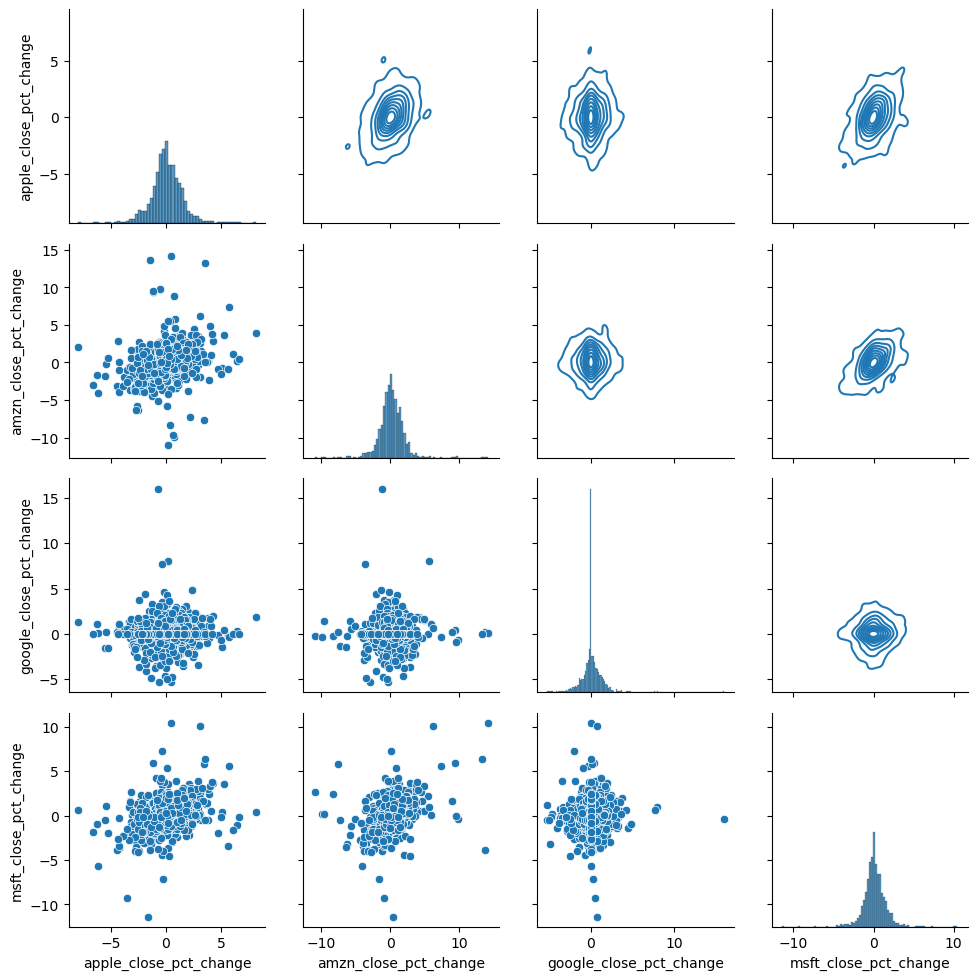

In [126]:
graph = sns.PairGrid(data = clsing_p)
graph.map_diag(sns.histplot)
graph.map_lower(sns.scatterplot)
graph.map_upper(sns.kdeplot)

In [127]:
clsing_p.corr()

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.032996,0.366598
amzn_close_pct_change,0.287659,1.000000,0.025323,0.402678
google_close_pct_change,0.032996,0.025323,1.000000,0.036436
msft_close_pct_change,0.366598,0.402678,0.036436,1.000000
